### 1. Bibliotecas

In [1]:
# Bibliotecas básicas
import os
import warnings
from itertools import product
import itertools

import numpy as np
import pandas as pd

#  Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem e aprendizado de máquina
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
import shap

# Pré-processamento e métricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

c:\Users\Usuaro\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Exibir todas as linhas e as colunas
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

# Evitar a exibição de avisos
warnings.filterwarnings('ignore')

# Definir diretório, caso queira importação off-line
os.chdir('G:/Meu Drive/MeuDrive2/tese_joao/dados')

### 2. Importando e analisando os dados

In [3]:
# Importar online via GitHub. Pode dar erro caso exista muitas requisições.
#url_rio = 'https://github.com/JoaoSilvaFelix/tese_joao/raw/main/dados/df_conjunto_rio.xlsx'
#df = pd.read_excel(url_rio)

# Importação off-line
df = pd.read_excel('df_conjunto_rio.xlsx')

In [4]:
# Primeiras obsevações
df.head()

,semana,cesta_dieese,carne,leite,feijao,arroz,farinha,batata,tomate,pao,cafe,banana,acucar,oleo,manteiga,cesta_online
0,2024-02-17,832.80,37.744242,5.733841,10.593814,8.140691,6.204888,10.690523,13.885938,17.481310,10.443632,10.391081,6.571818,7.215577,15.160869,869.421336
1,2024-02-24,832.80,39.572500,5.647962,10.497020,8.482756,6.266726,10.551940,10.393274,17.706250,10.580020,11.700119,6.457101,6.858187,14.152220,860.143939
2,2024-03-02,812.25,38.375646,5.838975,10.575376,8.469297,6.132982,9.492036,7.848884,17.431190,10.350879,11.409337,6.469864,6.864696,14.710850,821.915071
3,2024-03-09,812.25,38.577800,5.821377,10.911025,8.513660,6.273799,9.496840,10.056467,17.752200,10.286321,11.654762,6.414444,6.868618,13.484975,844.519938
4,2024-03-16,812.25,37.349214,5.840509,11.110905,8.407968,6.236424,9.187083,12.536667,17.984833,10.675233,11.651071,6.408998,6.788889,13.377476,860.083261


In [5]:
# Algumas estatísticas descritivas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
semana,68,2024-10-08 12:00:00,2024-02-17 00:00:00,2024-06-13 06:00:00,2024-10-08 12:00:00,2025-02-02 18:00:00,2025-05-31 00:00:00,NaN
cesta_dieese,68.0,799.526765,745.64,776.67,802.015,814.9,849.7,32.026548
carne,68.0,42.009957,32.371111,37.528304,38.925,47.524268,51.139848,5.752632
leite,68.0,6.485991,5.647962,6.305021,6.540609,6.736567,7.144311,0.355948
feijao,68.0,8.802655,7.317228,8.238944,8.60255,9.105345,11.110905,0.905051
arroz,68.0,8.007866,5.310918,8.019235,8.226531,8.418779,8.915868,0.727496
farinha,68.0,5.981121,5.160239,5.615242,6.027854,6.249862,7.254286,0.438494
batata,68.0,7.776393,4.99,6.02396,7.344245,8.630265,13.509286,2.151187
tomate,68.0,8.384108,4.825,6.49,8.230083,10.0275,13.885938,1.989586
pao,68.0,17.44384,9.99,16.033317,17.626736,19.353333,25.27125,3.024323


### Correlações

Abaixo, gráfico de correlação entre todas as variáveis numéricas, à exceção da coluna semana.

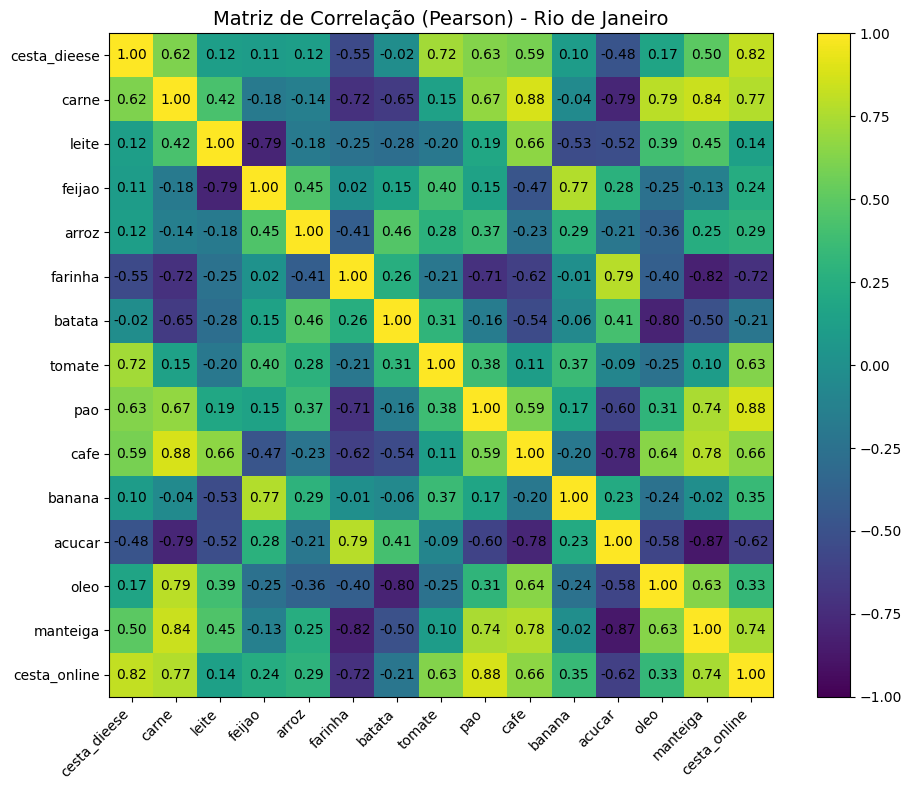

In [38]:
df_corr = df.drop(columns=['semana'])
corr = df_corr.corr()

fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap com escala fixa de -1 a 1
cax = ax.imshow(corr, vmin=-1, vmax=1)

# Rótulos dos eixos
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# Adicionar valores nas células
for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, 
                       f"{corr.iloc[i, j]:.2f}",
                       ha="center", 
                       va="center")

# Barra de cor
fig.colorbar(cax)

ax.set_title("Matriz de Correlação (Pearson) - Rio de Janeiro", fontsize=14)
plt.tight_layout()
plt.show()

Correlação entre o atributo cesta_dieese e todas as demais variáveis.

In [33]:
# Remover coluna temporal
df_corr = df.drop(columns=['semana'])

# Correlação com a variável alvo
corr_target = df_corr.corr()['cesta_dieese']

# Remover autocorrelação (1.0)
corr_target = corr_target.drop('cesta_dieese')

# Ordenar por valor absoluto (maior para menor)
corr_target_sorted = corr_target.reindex(
    corr_target.abs().sort_values(ascending=False).index
)

print(corr_target_sorted)

cesta_online    0.820220
tomate          0.724040
pao             0.631973
carne           0.615411
cafe            0.592404
farinha        -0.551323
manteiga        0.497470
acucar         -0.482527
oleo            0.170008
leite           0.121781
arroz           0.119982
feijao          0.107395
banana          0.103865
batata         -0.019369
Name: cesta_dieese, dtype: float64


Peso ponderado de cada produto em relação ao valor total da cesta tendo como referência o decreto 399 de 1938

In [34]:
# Definindo os pesos para aplicarmos no df_mensal e criar o df ponderado
pesos = {
    "carne": 6,
    "leite": 7.5,
    "feijao": 4.5,
    "arroz": 3,
    "farinha": 1.5,
    "batata": 6,
    "tomate": 9,
    "pao": 6,
    "cafe": 2.4,
    "banana": 11.25,
    "acucar": 3,
    "oleo": 0.833333,
    "manteiga": 3.75,
}

# Criar cópia
df_ponderado = df.copy()

# Selecionar apenas colunas que têm peso
colunas_ponderar = df.columns.intersection(pesos.keys())

# Aplicar ponderação
df_ponderado[colunas_ponderar] = (
    df_ponderado[colunas_ponderar]
        .mul(pd.Series(pesos))
)

Porporção média de cada produto ponderado em relação a cesta básica seguindo as diretrizes do decreto lei 399 de 1938. O produto carne em média representa 30,8% do valor da cesta básica para o período analisado. Utilizando os dados diários.

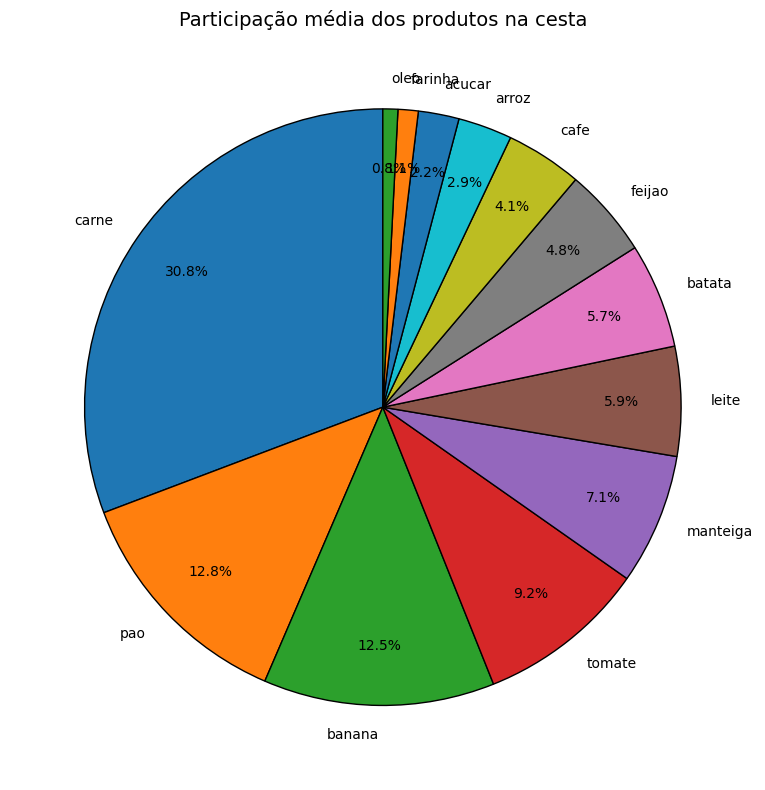

In [35]:
# Selecionar produtos ponderados
colunas_produtos = df_ponderado.columns.intersection(pesos.keys())

# Média temporal
medias_produtos = df_ponderado[colunas_produtos].mean()

# Ordenar da maior para a menor participação
medias_produtos = medias_produtos.sort_values(ascending=False)

# Criar gráfico
plt.figure(figsize=(8, 8))

plt.pie(
    medias_produtos,
    labels=medias_produtos.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.8
)

plt.title("Participação média dos produtos na cesta", fontsize=14)
plt.tight_layout()
plt.show()

In [36]:
# Selecionar produtos ponderados
colunas_produtos = df_ponderado.columns.intersection(pesos.keys())

# Média temporal de cada produto
medias_produtos = df_ponderado[colunas_produtos].mean()

# Calcular participação percentual
participacao = (medias_produtos / medias_produtos.sum()) * 100

# Organizar em DataFrame e ordenar
tabela_participacao = (
    participacao
    .sort_values(ascending=False)
    .to_frame(name="participacao_%")
)

tabela_participacao


,participacao_%
carne,30.756126
pao,12.770899
banana,12.526039
tomate,9.207199
manteiga,7.091282
leite,5.935615
batata,5.693215
feijao,4.833418
cafe,4.145183
arroz,2.931340


Comparação, para a cidade do Rio, entre os dados coletados online e os dados divulgados pelo DIEESE

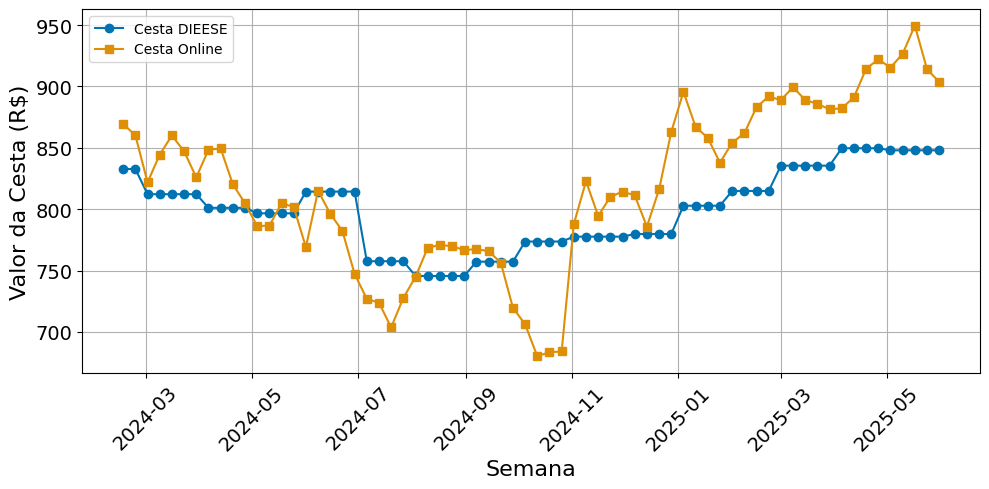

In [6]:
# Paleta daltônica
colors = sns.color_palette("colorblind")

# Criar figura
plt.figure(figsize=(10, 5))
plt.plot(df['semana'], df['cesta_dieese'], label='Cesta DIEESE', marker='o', color=colors[0])
plt.plot(df['semana'], df['cesta_online'], label='Cesta Online', marker='s', color=colors[1])


# Ajustes visuais
plt.xlabel('Semana', fontsize=16)   # legenda eixo x
plt.ylabel('Valor da Cesta (R$)', fontsize=16)  # legenda eixo y
plt.title('')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, fontsize=14)  # aumenta os números do eixo x
plt.yticks(fontsize=14)               # aumenta os números do eixo y
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3. Previsões

In [7]:
# Dados
X = df.drop(columns=['semana', 'cesta_dieese', 'cesta_online'])
y = df['cesta_dieese']

#### 3.1 Ridge

In [8]:
# Parâmetros para busca
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Armazenar resultados
resultados_parametros = {}

for alpha in param_grid['alpha']:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):  # Começa de i=10 para evitar modelos instáveis
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo Ridge
        model_ridge = Ridge(alpha=alpha)
        model_ridge.fit(X_train_scaled, y_train)
        y_pred = model_ridge.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # em %

    resultados_parametros[alpha] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Identificar melhor alpha com base no RMSE (poderia usar mae ou mape se quiser)
melhor_alpha = min(resultados_parametros, key=lambda a: resultados_parametros[a]['rmse'])

# Exibir resultados
print("Melhor alpha:", melhor_alpha)
print("Melhor RMSE:", resultados_parametros[melhor_alpha]['rmse'])
print("Melhor MAE:", resultados_parametros[melhor_alpha]['mae'])
print("Melhor MAPE: {:.2f}%".format(resultados_parametros[melhor_alpha]['mape']))

Melhor alpha: 0.1
Melhor RMSE: 17.450685538881523
Melhor MAE: 13.447117796982255
Melhor MAPE: 1.69%


In [9]:
# df para criação do plote de comparação dos resultados
df_resultado_ridge = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_alpha]['y_real'],
    'ridge': resultados_parametros[melhor_alpha]['y_pred']
})


#### 3.2 KNN

In [10]:
# Grade expandida de hiperparâmetros
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Gerar combinações de hiperparâmetros
combinacoes = list(itertools.product(
    param_grid['n_neighbors'],
    param_grid['weights'],
    param_grid['p']
))

# Armazenar resultados
resultados_parametros = {}

for n_neighbors, weights, p in combinacoes:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo KNN com múltiplos hiperparâmetros
        model_knn = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p
        )
        model_knn.fit(X_train_scaled, y_train)
        y_pred = model_knn.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_neighbors, weights, p)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Escolher o melhor conjunto de hiperparâmetros com base no RMSE
melhor_param = min(resultados_parametros, key=lambda x: resultados_parametros[x]['rmse'])

# Exibir resultados
print(f"Melhor combinação (n_neighbors, weights, p): {melhor_param}")
print(f"Melhor RMSE: {resultados_parametros[melhor_param]['rmse']}")
print(f"Melhor MAE: {resultados_parametros[melhor_param]['mae']}")
print(f"Melhor MAPE: {resultados_parametros[melhor_param]['mape']:.2f}%")

Melhor combinação (n_neighbors, weights, p): (2, 'distance', 2)
Melhor RMSE: 11.548179922733581
Melhor MAE: 6.285908159749493
Melhor MAPE: 0.80%


In [11]:
# df para acriação do plote de comparação dos resultados
df_resultado_knn = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_param]['y_real'],
    'knn': resultados_parametros[melhor_param]['y_pred']
})

#### 3.3 XGBoost

In [12]:
# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],         # número de árvores
    'max_depth': [3, 5, 7],                 # profundidade da árvore
    'learning_rate': [0.01, 0.05, 0.1],     # taxa de aprendizado
    'subsample': [0.8, 1.0],                # amostragem das linhas
    'colsample_bytree': [0.8, 1.0]          # amostragem das colunas
}

# Gerar combinações de parâmetros (limitado aqui a 3 para não gerar grade muito grande)
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['learning_rate']
))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d, lr in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Modelo XGBoost
        model_xgb = XGBRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            learning_rate=lr,
            objective='reg:squarederror',
            verbosity=0,
            random_state=42
        )
        model_xgb.fit(X_train_scaled, y_train)
        y_pred = model_xgb.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d, lr)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Melhor combinação (menor RMSE)
melhor_params = min(resultados_parametros, key=lambda p: resultados_parametros[p]['rmse'])
melhor_resultado = resultados_parametros[melhor_params]

# Exibir resultados
print(f"Melhor combinação:")
print(f"n_estimators = {melhor_params[0]}")
print(f"max_depth    = {melhor_params[1]}")
print(f"learning_rate= {melhor_params[2]}")
print(f"RMSE: {melhor_resultado['rmse']:.4f}")
print(f"MAE:  {melhor_resultado['mae']:.4f}")
print(f"MAPE: {melhor_resultado['mape']:.2f}%")

Melhor combinação:
n_estimators = 200
max_depth    = 7
learning_rate= 0.1
RMSE: 17.9134
MAE:  10.6475
MAPE: 1.36%


In [13]:
# df para criação do plote de comparação dos resultados
df_resultado_xgb = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_params]['y_real'],
    'xgb': resultados_parametros[melhor_params]['y_pred']
})

#### 3.4 RandomForest

In [14]:
# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
param_combinations = list(product(param_grid['n_estimators'], param_grid['max_depth']))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):  # Começa de i=10 para estabilidade
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo Random Forest
        model_rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            random_state=42
        )
        model_rf.fit(X_train_scaled, y_train)
        y_pred = model_rf.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Melhor combinação
melhor_params = min(resultados_parametros, key=lambda p: resultados_parametros[p]['rmse'])
melhor_resultado = resultados_parametros[melhor_params]

print(f"Melhor combinação: n_estimators={melhor_params[0]}, max_depth={melhor_params[1]}")
print(f"   → RMSE: {melhor_resultado['rmse']:.4f}")
print(f"   → MAE:  {melhor_resultado['mae']:.4f}")
print(f"   → MAPE: {melhor_resultado['mape']:.2f}%")

Melhor combinação: n_estimators=50, max_depth=7
   → RMSE: 15.5775
   → MAE:  12.1166
   → MAPE: 1.54%


In [15]:
# df para criação do plote de comparação dos resultados
df_resultado_rf = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_params]['y_real'],
    'rf': resultados_parametros[melhor_params]['y_pred']
})

#### 3.5 DF de compração dos resultados

In [16]:
df_comparacao = pd.DataFrame({
    'semana': df_resultado_ridge['semana'],  # semanas alinhadas
    'real': df_resultado_ridge['real'],
    'ridge': df_resultado_ridge['ridge'],
    'random_forest': df_resultado_rf['rf'],
    'knn': df_resultado_knn['knn'],
    'xgb': df_resultado_xgb['xgb']  
})

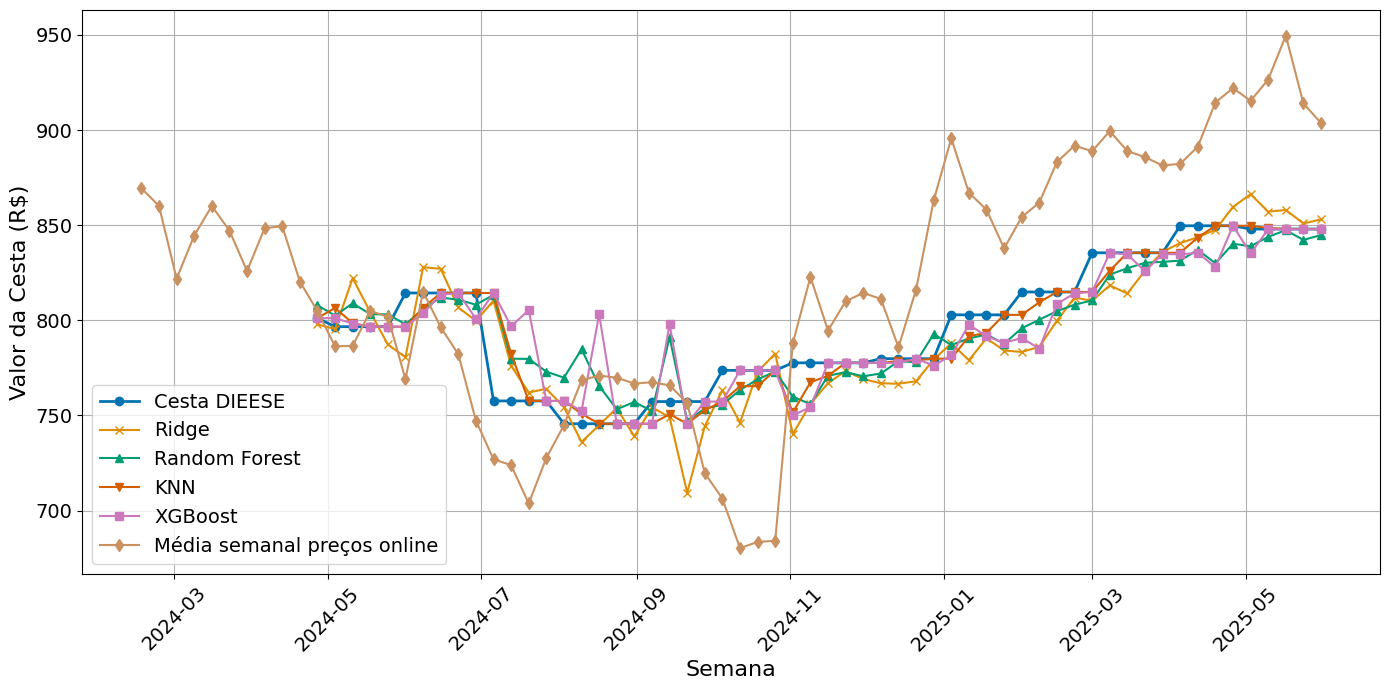

In [17]:
# Paleta daltônica
colors = sns.color_palette("colorblind")

# Criar figura
plt.figure(figsize=(14, 7))

# Plotando as séries
plt.plot(df_comparacao['semana'], df_comparacao['real'], label='Cesta DIEESE', marker='o', linewidth=2, color=colors[0])
plt.plot(df_comparacao['semana'], df_comparacao['ridge'], label='Ridge', marker='x', color=colors[1])
plt.plot(df_comparacao['semana'], df_comparacao['random_forest'], label='Random Forest', marker='^', color=colors[2])
plt.plot(df_comparacao['semana'], df_comparacao['knn'], label='KNN', marker='v', color=colors[3])
plt.plot(df_comparacao['semana'], df_comparacao['xgb'], label='XGBoost', marker='s', color=colors[4])
plt.plot(df['semana'], df['cesta_online'], label='Média semanal preços online', marker='d', color=colors[5])

# Ajustes visuais
plt.xlabel('Semana', fontsize=16)
plt.ylabel('Valor da Cesta (R$)', fontsize=16)
plt.title('')
plt.legend(fontsize=14)
plt.grid(True)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 4. Importância de permutação e previsão do algoritmo KNN

Verificando a importância de permutação do algoritmo de melhore performance. Rodando o código do modelo KNN novamente para evitar conflito com os demais modelos

In [18]:
# Grade expandida de hiperparâmetros
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Gerar combinações de hiperparâmetros
combinacoes = list(itertools.product(
    param_grid['n_neighbors'],
    param_grid['weights'],
    param_grid['p']
))

# Armazenar resultados
resultados_parametros = {}

for n_neighbors, weights, p in combinacoes:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo KNN com múltiplos hiperparâmetros
        model_knn = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p
        )
        model_knn.fit(X_train_scaled, y_train)
        y_pred = model_knn.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_neighbors, weights, p)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Escolher o melhor conjunto de hiperparâmetros com base no RMSE
melhor_param = min(resultados_parametros, key=lambda x: resultados_parametros[x]['rmse'])

# Exibir resultados
print(f"Melhor combinação (n_neighbors, weights, p): {melhor_param}")
print(f"Melhor RMSE: {resultados_parametros[melhor_param]['rmse']}")
print(f"Melhor MAE: {resultados_parametros[melhor_param]['mae']}")
print(f"Melhor MAPE: {resultados_parametros[melhor_param]['mape']:.2f}%")

Melhor combinação (n_neighbors, weights, p): (2, 'distance', 2)
Melhor RMSE: 11.548179922733581
Melhor MAE: 6.285908159749493
Melhor MAPE: 0.80%


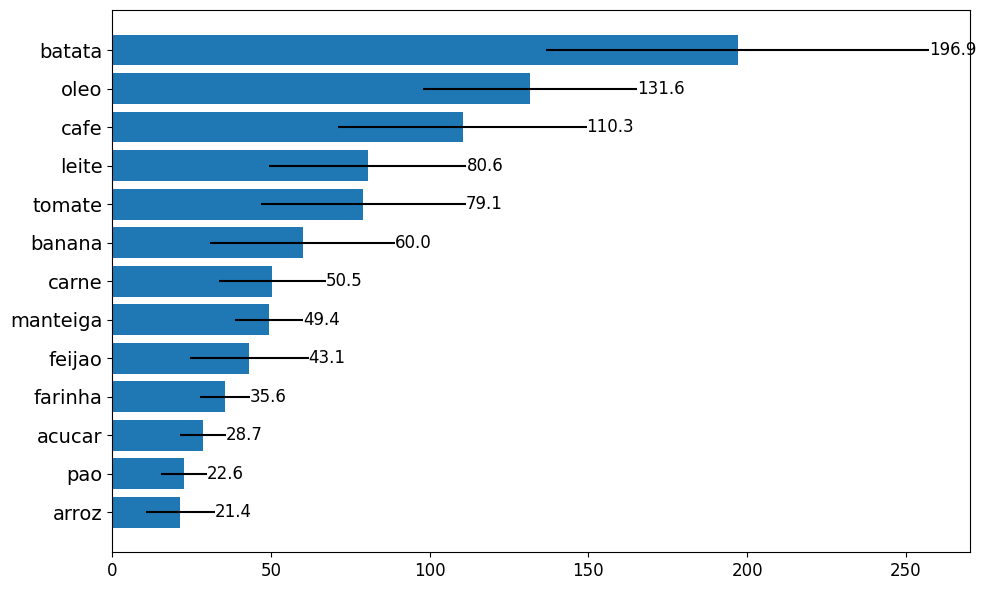

In [19]:
# Reescalar os dados com o scaler final
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Recriar o melhor modelo KNN com os melhores hiperparâmetros encontrados
model_final = KNeighborsRegressor(
    n_neighbors=melhor_param[0],
    weights=melhor_param[1],
    p=melhor_param[2]
)
model_final.fit(X_scaled_final, y)

# Calcular a importância por permutação usando RMSE (negativo)
resultado_perm = permutation_importance(
    model_final, X_scaled_final, y,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Processar os resultados
importancias = resultado_perm.importances_mean
erros = resultado_perm.importances_std
nomes_variaveis = X.columns

# Ordenar para o gráfico
indices = np.argsort(importancias)

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(range(len(importancias)), importancias[indices], xerr=erros[indices], align='center')

# Eixo Y com nomes das variáveis
plt.yticks(range(len(importancias)), nomes_variaveis[indices], fontsize=14)

# Aumentar ticks do eixo X
plt.xticks(fontsize=12)

plt.xlabel("", fontsize=14)   # legenda eixo X
plt.title("", fontsize=14)    # título (se quiser maior também)

# Valores nas barras
for i, v in enumerate(importancias[indices]):
    plt.text(v + erros[indices][i] + 0.001, i, f"{v:.1f}", va='center', fontsize=12)

plt.tight_layout()

# Exibir o gráfico
plt.show()

#### Tabela importâncias modelo KNN

In [37]:
# Processar os resultados
importancias = resultado_perm.importances_mean
erros = resultado_perm.importances_std
nomes_variaveis = X.columns

# Criar DataFrame com as importâncias
df_importancias = pd.DataFrame({
    "variavel": nomes_variaveis,
    "importancia_media": importancias,
    "desvio_padrao": erros
})

# Ordenar da maior para a menor importância
df_importancias = df_importancias.sort_values(
    by="importancia_media",
    ascending=False
).reset_index(drop=True)

# Exibir tabela completa
print(df_importancias)

    variavel  importancia_media  desvio_padrao
0     batata         196.948058      60.201579
1       oleo         131.613203      33.698749
2       cafe         110.349545      39.069370
3      leite          80.566550      31.035459
4     tomate          79.079329      32.271892
5     banana          60.014409      29.028098
6      carne          50.494277      16.893699
7   manteiga          49.447949      10.780903
8     feijao          43.132104      18.728912
9    farinha          35.586188       7.759873
10    acucar          28.659600       7.232737
11       pao          22.573845       7.289363
12     arroz          21.441671      10.813272


Comparação Previsão do modelo KNN e o observaso pelo DIEESE

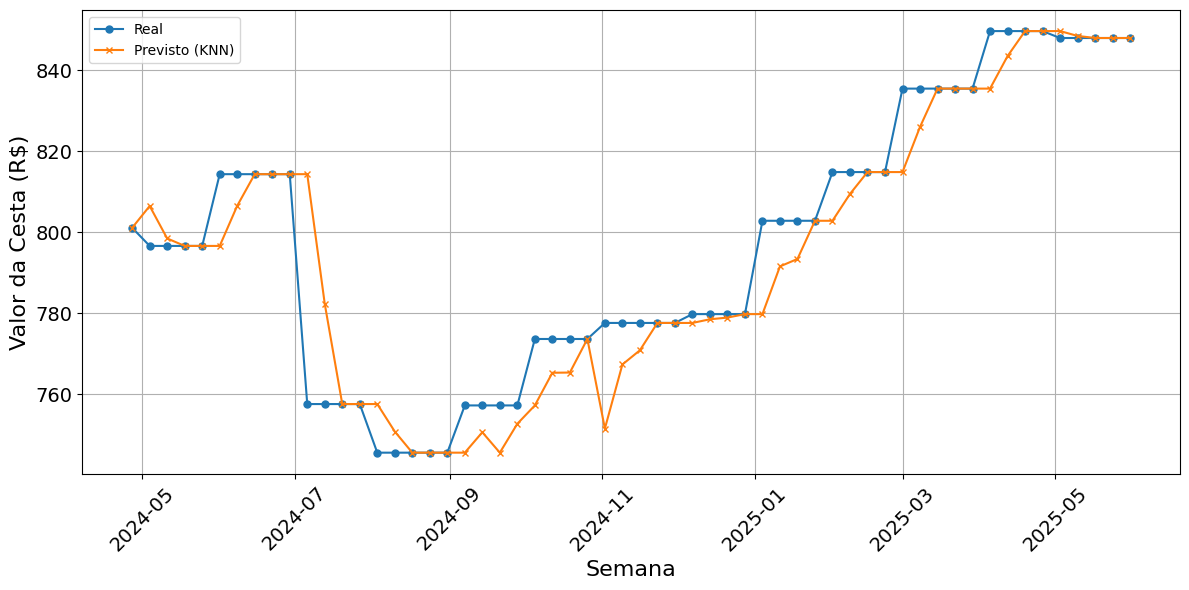

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df_resultado_knn['semana'], df_resultado_knn['real'], label='Real', marker='o', markersize=5)
plt.plot(df_resultado_knn['semana'], df_resultado_knn['knn'], label='Previsto (KNN)', marker='x', markersize=5)
plt.xlabel('Semana', fontsize=16)
plt.ylabel('Valor da Cesta (R$)', fontsize=16)
plt.title('')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)   
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 5. Análise SHAP dos modelos XGB e RandomForest

#### 5.1 Análise SHAP do modelo XGBoost

In [21]:
# Dados
X = df.drop(columns=['semana', 'cesta_dieese', 'cesta_online'])
y = df['cesta_dieese']

In [22]:
# Rodando novamente o código do modelo XGBoost para evitar conflitos

# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [3, 5, 7],                 
    'learning_rate': [0.01, 0.05, 0.1],     
    'subsample': [0.8, 1.0],                
    'colsample_bytree': [0.8, 1.0]          
}

# Gerar combinações de parâmetros (limitado aqui a 3 para não gerar grade muito grande)
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['learning_rate']
))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d, lr in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Modelo XGBoost
        model_xgb = XGBRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            learning_rate=lr,
            objective='reg:squarederror',
            verbosity=0,
            random_state=42
        )
        model_xgb.fit(X_train_scaled, y_train)
        y_pred = model_xgb.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d, lr)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

In [23]:
# Encontrar o melhor conjunto de parâmetros com base no RMSE
melhor_params = min(resultados_parametros, key=lambda k: resultados_parametros[k]['rmse'])
print("Melhor conjunto encontrado:", melhor_params)
print("Métricas:", resultados_parametros[melhor_params])

Melhor conjunto encontrado: (200, 7, 0.1)
Métricas: {'rmse': np.float64(17.91336573983554), 'mae': 10.647473775929425, 'mape': 1.3574477770486335, 'y_real': [np.float64(801.15), np.float64(796.67), np.float64(796.67), np.float64(796.67), np.float64(796.67), np.float64(814.38), np.float64(814.38), np.float64(814.38), np.float64(814.38), np.float64(814.38), np.float64(757.64), np.float64(757.64), np.float64(757.64), np.float64(757.64), np.float64(745.64), np.float64(745.64), np.float64(745.64), np.float64(745.64), np.float64(745.64), np.float64(757.3), np.float64(757.3), np.float64(757.3), np.float64(757.3), np.float64(773.7), np.float64(773.7), np.float64(773.7), np.float64(773.7), np.float64(777.66), np.float64(777.66), np.float64(777.66), np.float64(777.66), np.float64(777.66), np.float64(779.84), np.float64(779.84), np.float64(779.84), np.float64(779.84), np.float64(802.88), np.float64(802.88), np.float64(802.88), np.float64(802.88), np.float64(814.9), np.float64(814.9), np.float64(8

PermutationExplainer explainer: 69it [00:32,  2.09it/s]                        


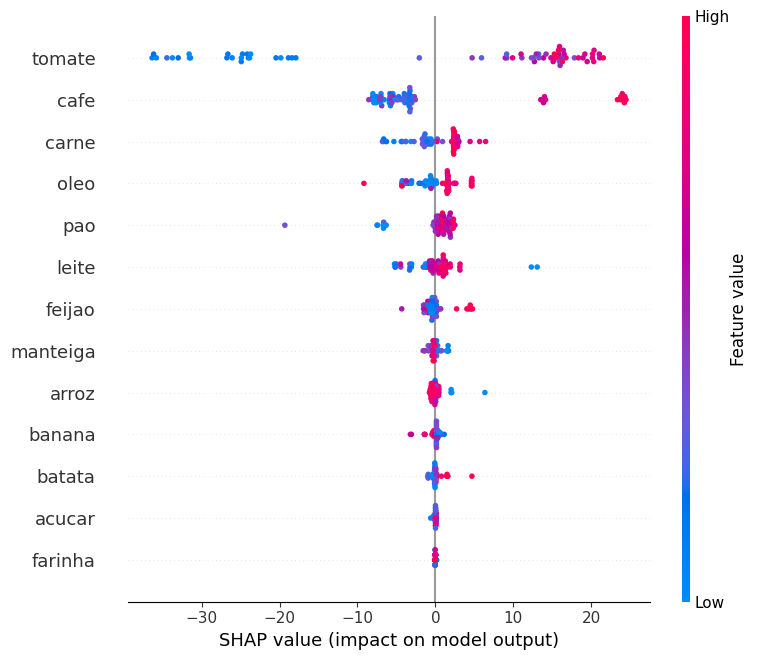

In [24]:
# Escalonar
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo
model_final = XGBRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    learning_rate=melhor_params[2],
    objective='reg:squarederror',
    verbosity=0,
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Explicador SHAP sem TreeExplainer
masker = shap.maskers.Independent(X_scaled_final)
explainer = shap.Explainer(model_final.predict, masker)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gera o gráfico (sem mostrar)
shap.summary_plot(shap_values, features=X, feature_names=X.columns, show=False)

PermutationExplainer explainer: 69it [00:24,  1.00it/s]                        


<Axes: xlabel='mean(|SHAP value|)'>

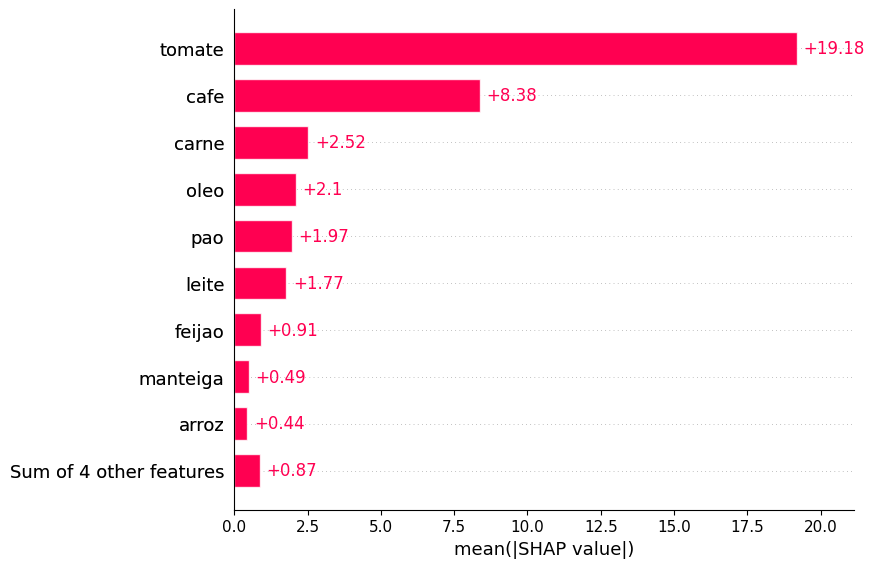

In [25]:
# Escalonar
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo
model_final = XGBRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    learning_rate=melhor_params[2],
    objective='reg:squarederror',
    verbosity=0,
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Explicador SHAP sem TreeExplainer
masker = shap.maskers.Independent(X_scaled_final)
explainer = shap.Explainer(model_final.predict, masker, feature_names=X.columns)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gerar gráfico de barras com nomes dos atributos
shap.plots.bar(shap_values, show=False)

#### 5.2 Análise SHAP do modelo RandomForest

In [26]:
# Dados
X = df.drop(columns=['semana', 'cesta_dieese', 'cesta_online'])
y = df['cesta_dieese']

In [27]:
# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
param_combinations = list(product(param_grid['n_estimators'], param_grid['max_depth']))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):  # Começa de i=10 para estabilidade
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo Random Forest
        model_rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            random_state=42
        )
        model_rf.fit(X_train_scaled, y_train)
        y_pred = model_rf.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Melhor combinação
melhor_params = min(resultados_parametros, key=lambda p: resultados_parametros[p]['rmse'])
melhor_resultado = resultados_parametros[melhor_params]

print(f"Melhor combinação: n_estimators={melhor_params[0]}, max_depth={melhor_params[1]}")
print(f"   → RMSE: {melhor_resultado['rmse']:.4f}")
print(f"   → MAE:  {melhor_resultado['mae']:.4f}")
print(f"   → MAPE: {melhor_resultado['mape']:.2f}%")

Melhor combinação: n_estimators=50, max_depth=7
   → RMSE: 15.5775
   → MAE:  12.1166
   → MAPE: 1.54%


PermutationExplainer explainer: 69it [00:25,  1.99it/s]                        


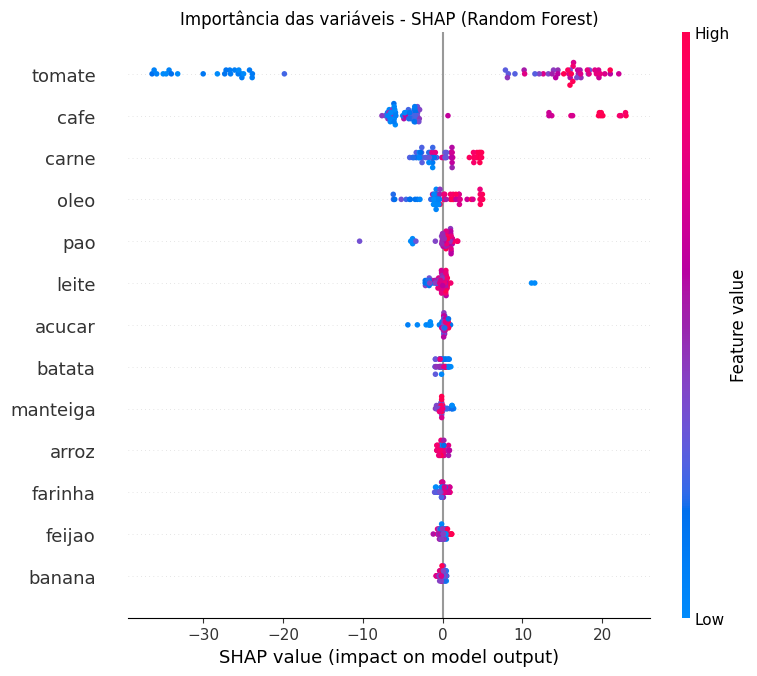

In [28]:
# Escalonar todos os dados
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo encontrado
model_final = RandomForestRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Criar o explicador SHAP (sem TreeExplainer)
masker = shap.maskers.Independent(X_scaled_final)
explainer = shap.Explainer(model_final.predict, masker)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gera o gráfico SHAP com nomes das features
shap.summary_plot(
    shap_values,
    features=X,                # DataFrame original
    feature_names=X.columns,   # Nomes das colunas
    show=False
)
plt.title("Importância das variáveis - SHAP (Random Forest)")
plt.show()

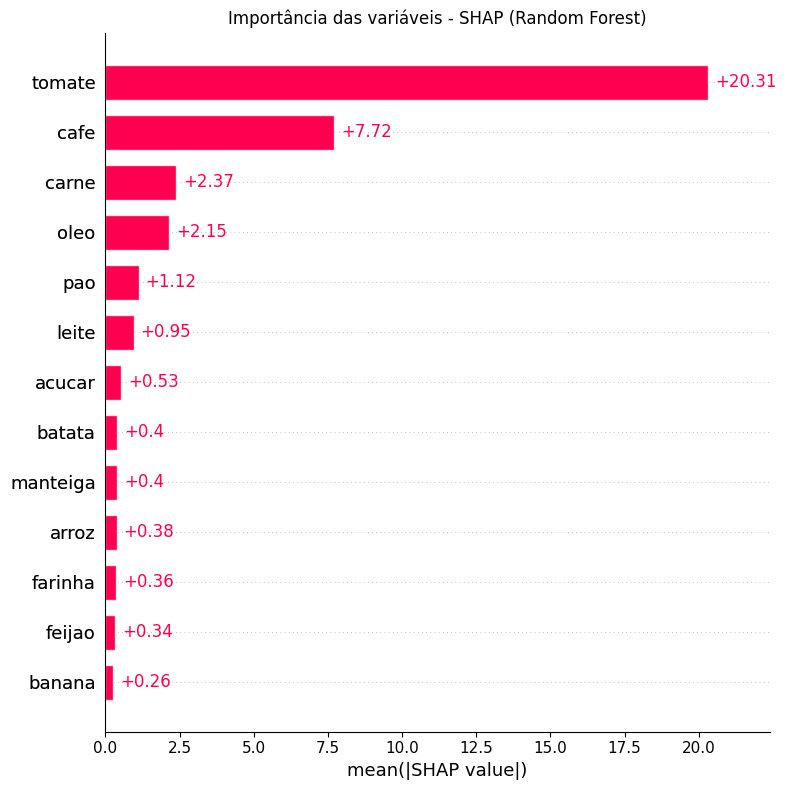

In [29]:
# Escalonar os dados
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo Random Forest
model_final = RandomForestRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Criar o explicador SHAP para modelos de árvore (RandomForest)
explainer = shap.Explainer(
    model_final, 
    X_scaled_final, 
    feature_names=X.columns  # garante que os nomes das variáveis apareçam
)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gerar gráfico de barras com nomes das variáveis
shap.plots.bar(
    shap_values,
    max_display=len(X.columns),  # mostra todas as variáveis
    show=False
)

plt.title("Importância das variáveis - SHAP (Random Forest)")
plt.tight_layout()
plt.show()

### Métricas de avaliação da média ponderada

In [30]:
def metricas(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mae  = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

In [31]:
rmse, mae, mape = metricas(
    df["cesta_dieese"].values,
    df["cesta_online"].values
)

print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"MAPE : {mape:.2f}%")

RMSE : 48.48
MAE  : 40.93
MAPE : 5.08%
